In [1]:
import os
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
api_key = '--Put your API Key--'

In [3]:
channel_IDs = ['UCS261lQDXjMvc8Jck-2CQEg', #Gyan Therapy
                'UCXUJJNoP1QupwsYIWFXmsZg', # Tech Burner
                'UCOhHO2ICt0ti9KAh-QHvttQ', #Technical Guruji
                'UCO2WJZKQoDW4Te6NHx4KfTg', #GeekyRanjit
                'UCdp6GUwjKscp5ST4M4WgIpw', #Techwiser
                'UCvpfclapgcuJo0M_x65pfRw', #Beebom
                'UCEPL07qzVsOcHd3sMUws65g', #TrakinTech
                'UCdoDYkupTElV62K7ttA_E4w', #TechBar
                'UCtu_QzoqdLjRt3Nmqe7aeqg',#bengali techsci guy 
                'UCltuKUCkE82ojAtPJy9rFQA', #venom tech
                'UCbhZ9mHpd_4dMT7bSqjixQQ' #Utsav Techie
] 

In [4]:
youtube = build('youtube','v3',developerKey=api_key)

In [5]:
request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id="," . join(channel_IDs))
resp = request.execute()

In [6]:
all_data = []

In [25]:
# The time portion of the Channel_Since is ignored because it has no significance in this project.  

all_data = []
for i in range(len(resp['items'])):
    channel_data = dict(Channel_name=resp['items'][i]['snippet']['title'],
                        Channel_Subscriber_Count = resp['items'][i]['statistics']['subscriberCount'],
                        Chennel_View_Count = resp['items'][i]['statistics']['viewCount'],
                        Chennel_Video_Count = resp['items'][i]['statistics']['videoCount'],
                        Channel_Since = resp['items'][i]['snippet']['publishedAt'].split("T")[0])
    all_data.append(channel_data)

In [26]:
print(type(all_data))

<class 'list'>


In [27]:
print (all_data)

[{'Channel_name': 'Beebom', 'Channel_Subscriber_Count': '3030000', 'Chennel_View_Count': '785993898', 'Chennel_Video_Count': '1139', 'Channel_Since': '2016-02-09'}, {'Channel_name': 'TechWiser', 'Channel_Subscriber_Count': '1780000', 'Chennel_View_Count': '358633388', 'Chennel_Video_Count': '972', 'Channel_Since': '2011-09-11'}, {'Channel_name': 'Gyan Therapy', 'Channel_Subscriber_Count': '2850000', 'Chennel_View_Count': '614572354', 'Chennel_Video_Count': '1125', 'Channel_Since': '2018-08-05'}, {'Channel_name': 'Trakin Tech', 'Channel_Subscriber_Count': '13700000', 'Chennel_View_Count': '2418880520', 'Chennel_Video_Count': '3737', 'Channel_Since': '2011-11-02'}, {'Channel_name': 'TechBar', 'Channel_Subscriber_Count': '4350000', 'Chennel_View_Count': '990546484', 'Chennel_Video_Count': '1221', 'Channel_Since': '2012-02-25'}, {'Channel_name': 'Technical Guruji', 'Channel_Subscriber_Count': '23300000', 'Chennel_View_Count': '3498929824', 'Chennel_Video_Count': '5184', 'Channel_Since': '2

In [29]:
with open('D:\\YT_Analysis_Json_Dump\\YT_Analysis.json', 'w') as out_file:
     json.dump(all_data, out_file)

In [30]:
out_file.close()

In [31]:
Formatted_Channel_Data = pd.DataFrame(all_data)
Formatted_Channel_Data['Channel_Subscriber_Count'] = pd.to_numeric(Formatted_Channel_Data['Channel_Subscriber_Count'])
Formatted_Channel_Data['Chennel_View_Count'] = pd.to_numeric(Formatted_Channel_Data['Chennel_View_Count'])
Formatted_Channel_Data['Chennel_Video_Count'] = pd.to_numeric(Formatted_Channel_Data['Chennel_Video_Count'])
Formatted_Channel_Data['Channel_Since'] = pd.to_datetime(Formatted_Channel_Data['Channel_Since'])

In [32]:
# Date time conversion understanding
# Formatted_Channel_Data = []
# date = []
# for i in range(11):
#     date.append(all_data[i]['Channel_Since'].split("T")[0])

In [33]:
print(Formatted_Channel_Data)

        Channel_name  Channel_Subscriber_Count  Chennel_View_Count  \
0             Beebom                   3030000           785993898   
1          TechWiser                   1780000           358633388   
2       Gyan Therapy                   2850000           614572354   
3        Trakin Tech                  13700000          2418880520   
4            TechBar                   4350000           990546484   
5   Technical Guruji                  23300000          3498929824   
6        Geekyranjit                   3310000           825047067   
7       Venom's Tech                    718000           166076294   
8        TechSci Guy                   1340000           207387213   
9        Tech Burner                  11000000          1853141972   
10      Utsav Techie                    759000           199871109   

    Chennel_Video_Count Channel_Since  
0                  1139    2016-02-09  
1                   972    2011-09-11  
2                  1125    2018-08-05  

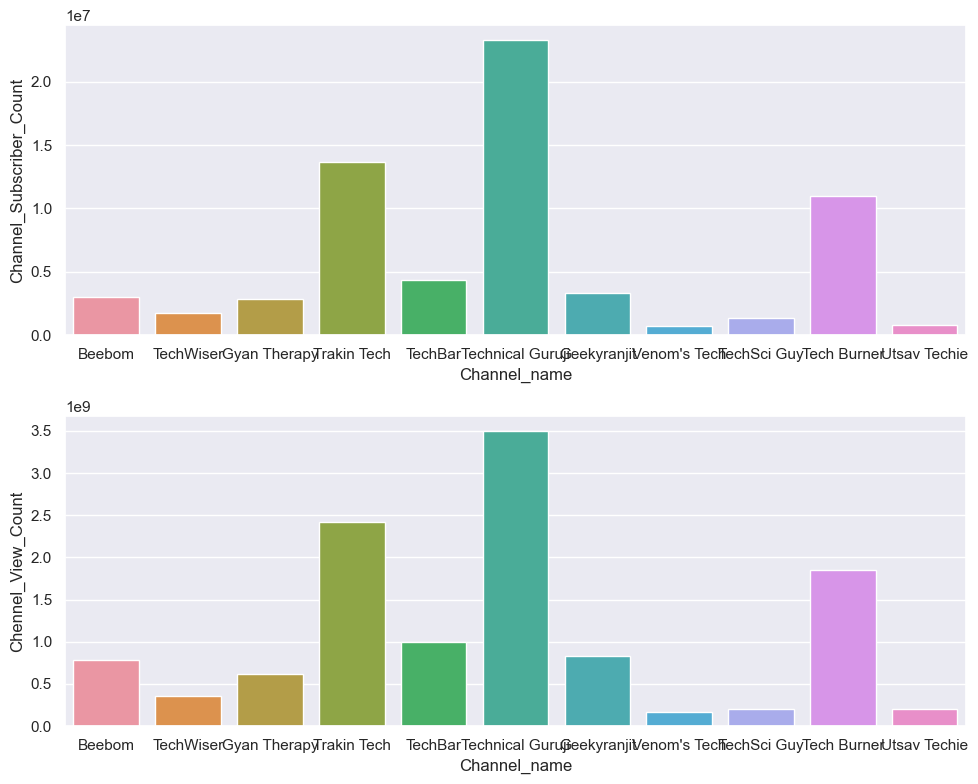

In [45]:
# Create a figure and axes for the first two barplots in two rows
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sns.set_style('darkgrid')

# Create the first barplot on the first axis
sns.barplot(x='Channel_name', y='Channel_Subscriber_Count', data=Formatted_Channel_Data, ax=ax1)

# Create the second barplot on the second axis
sns.barplot(x='Channel_name', y='Chennel_View_Count', data=Formatted_Channel_Data, ax=ax2)

# Show the plots
plt.tight_layout()
plt.show()
